# 載入 cifar10 資料集

In [1]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 查看資料的 shape

In [2]:
print('x_train shape:',x_train.shape)
print('x_test shape:',x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [3]:
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

y_train shape: (50000, 1)
y_test shape: (10000, 1)


# 查看標籤的內容 

In [4]:
#查看前10個訓練標籤
print(y_train[0:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


# 進行 min-max normalization

In [6]:
x_train_norm = x_train.astype('float32') / 255
x_test_norm = x_test.astype('float32') / 255

In [7]:
#min-max normalization 後
print(x_train_norm[0][0][0])

[0.23137255 0.24313726 0.24705882]


# 將數字標籤進行 One-hot 編碼

In [8]:
from tensorflow.keras import utils

# 轉換前
print(y_train[0])

[6]


In [10]:
# 進行 One-hot 編碼轉換...
y_train_onehot = utils.to_categorical(y_train, 10) #將訓練標籤進行 one-hot編碼
y_test_onehot = utils.to_categorical(y_test, 10) #將訓練標籤進行 one-hot編碼

# 轉換後
print(y_train_onehot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 建立 CNN 神經網路架構

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [15]:
# CNN
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), activation = 'relu', padding='same',input_shape = (32, 32, 3)))#捲積層
cnn.add(Dropout(0.25)) #dorpout
cnn.add(MaxPooling2D((2,2))) #池化層

cnn.add(Conv2D(64,(3,3),padding='same', activation = 'relu')) #捲積層
cnn.add(Dropout(0.25)) #dorpout
cnn.add(MaxPooling2D((2,2))) #池化層

cnn.add(Flatten()) #展平層
cnn.add(Dropout(0.25))  #dorpout
cnn.add(Dense(1024, activation='relu')) #密集層
cnn.add(Dropout(0.25)) #dorpout
cnn.add(Dense(10, activation='softmax'))   #密集層(輸出分類)

In [17]:
# 神經網路的訓練配置 #
cnn.compile(loss = 'categorical_crossentropy',
           optimizer='adam',
           metrics=['acc'])

In [19]:
# 進行訓練 #
history = cnn.fit(x = x_train_norm,
                 y =y_train_onehot,
                 batch_size = 128,
                 epochs = 20,
                 validation_split = 0.1,)

Epoch 1/20
352/352 [==============================] - 50s 141ms/step - loss: 1.5589 - acc: 0.4396 - val_loss: 1.3272 - val_acc: 0.5692
Epoch 2/20
352/352 [==============================] - 50s 143ms/step - loss: 1.1826 - acc: 0.5785 - val_loss: 1.1359 - val_acc: 0.6348
Epoch 3/20
352/352 [==============================] - 50s 141ms/step - loss: 1.0332 - acc: 0.6332 - val_loss: 1.0490 - val_acc: 0.6650
Epoch 4/20
352/352 [==============================] - 51s 145ms/step - loss: 0.9271 - acc: 0.6731 - val_loss: 0.9808 - val_acc: 0.6762
Epoch 5/20
352/352 [==============================] - 50s 143ms/step - loss: 0.8403 - acc: 0.7028 - val_loss: 0.8958 - val_acc: 0.7162
Epoch 6/20
352/352 [==============================] - 50s 142ms/step - loss: 0.7582 - acc: 0.7360 - val_loss: 0.8620 - val_acc: 0.7194
Epoch 7/20
352/352 [==============================] - 51s 144ms/step - loss: 0.6908 - acc: 0.7592 - val_loss: 0.8656 - val_acc: 0.7214
Epoch 8/20
352/352 [==============================] - 5

# 繪製圖表

In [29]:
def show_train_history(history,train,validation,label):
    plt.plot(history.history[train])
    plt.plot(history.history[validation])
    plt.title("Train History")
    plt.ylabel(label)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

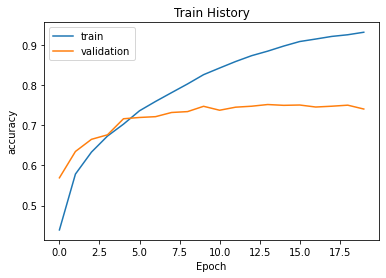

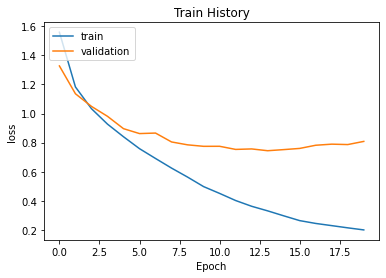

In [30]:
show_train_history(history,'acc','val_acc','accuracy')
show_train_history(history,'loss','val_loss','loss')

In [20]:
# --  儲存模型 -- #
cnn.save('CNN_Model.h5')

In [21]:
# -- 儲存模型權重-- #
cnn.save_weights('CNN_weights.h5')

In [22]:
# -- 載入模型 -- #
from tensorflow.keras.models import load_model

old_cnn = load_model('CNN_Model.h5')
print('載入模型成功')

載入模型成功


# 使用測試資料評估神經網路

In [25]:
# evaluate
test_loss, test_val = cnn.evaluate(x_test_norm, y_test_onehot)
print('測試資料損失值:', test_loss)
print('測試資料準確度:', test_val)

313/313 [==============================] - 3s 8ms/step - loss: 0.8149 - acc: 0.7353
測試資料損失值: 0.8149274587631226
測試資料準確度: 0.7353000044822693


In [26]:
# predict
predict_prop = cnn.predict(x_test_norm)
print('第一筆測試資料的預測機率', predict_prop[0])

第一筆測試資料的預測機率 [3.6579205e-03 7.2720766e-05 5.8793658e-03 9.2825019e-01 2.9498094e-04
 4.2516407e-02 1.2399842e-02 3.3020187e-04 2.8033759e-03 3.7950878e-03]


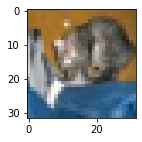

In [27]:
# -- 查看測試資料的第 1 張圖片 -- #
import matplotlib.pyplot as plt

fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(x_test[0])
plt.show()

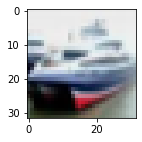

In [28]:
# -- 查看測試資料的第 2 張圖片 -- #
fig = plt.gcf()
fig.set_size_inches(2, 2)
plt.imshow(x_test[1])
plt.show()

In [31]:
# -- 直接預測數字標籤 -- #
predict_class = cnn.predict_classes(x_test_norm)
print('前 10 筆預測標籤:', predict_class[: 10])
print('前 10 筆原始標籤:', y_test[: 10].reshape(10))

/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


前 10 筆預測標籤: [3 8 8 0 6 6 1 6 3 1]
前 10 筆原始標籤: [3 8 8 0 6 6 1 6 3 1]
